# CS584 Assignment 1 by Linsen Li

In [107]:
# Read the txt file and store them as list variable
# each element in the list is a row in the previous txt file
# the txt file should be in the same dictionary as /data/file.txt
with open('./data/28054-0.txt', 'r') as f:
    x1 = f.readlines()

with open('./data/pg1661.txt', 'r') as f:
    x2 = f.readlines()
    
with open('./data/pg31100.txt', 'r') as f:
    x3 = f.readlines()
    

# 1. Data pre-processing
- Remove punctuation, irrelevant symbols, urls, and numbers.
  - Use Regular expressions pattern to replace these with space
- Divide each document into multiple paragraphs.Each paragraph will be one example.
  - The document use \n\n to split the paragraphs
  - Each paragraph should long enough to in case of the dialogue
    - Assume each paragraph's length longer than 900 space
    - https://strainindex.wordpress.com/2010/10/25/plain-paragraph-length/
- Report the total number of examples for each category.

In [283]:
import re
import numpy as np
import pandas as pd
# Data pre-processing function
# Input:
#     text: the document
#     category: the category of the document, we assign 0, 1, 2 to this variable
#     n: the length of the paragraph, use to control the sample size,have to tune
# Return:
#     tol_num: the total number of examples for each category
#     df: the Dataframe variable after assign each paragraphs a category 
def prepare(text, category, n):
    # Divide each document into multiple paragraphs.
    s = ''.join(text)
    l = s.split('\n\n')
    l1 = [i.strip() for i in l if len(i) > n]
    # Remove punctuation, irrelevant symbols, urls, and numbers
    l2 = [re.sub('[^A-Za-z0-9]+', ' ', i).lower().strip() for i in l1]
    tol_num = len(l2)
    # Create the dataframe object
    cate_array = np.ones((tol_num,)) * category
    df = pd.DataFrame({'paragraph': l2, 'category':cate_array })
    print('The total number of examples for category ' + str(category)+ ' is: ' + str(tol_num))
    return df, tol_num


In [284]:
df1, num1 = prepare(x1, 0, 600)
df2, num2 = prepare(x2, 1, 200)
df3, num3 = prepare(x3, 2, 1000)


The total number of examples for category 0 is: 941
The total number of examples for category 1 is: 837
The total number of examples for category 2 is: 930


In [250]:
df1

,paragraph,category
0,alexey fyodorovitch karamazov was the third so...,0.0
1,he was married twice and had three sons the el...,0.0
2,immediately after the elopement adela da ivano...,0.0
3,one would think that you d got a promotion fyo...,0.0
4,you can easily imagine what a father such a ma...,0.0
...,...,...
936,at last came the funeral service itself and ca...,0.0
937,one of the boys observed that it was awkward f...,0.0
938,some one called to him to put on his hat as it...,0.0
939,boys we shall soon part i shall be for some ti...,0.0


In [251]:
df2

,paragraph,category
0,to sherlock holmes she is always the woman i h...,1.0
1,i had seen little of holmes lately my marriage...,1.0
2,one night it was on the twentieth of march 188...,1.0
3,his manner was not effusive it seldom was but ...,1.0
4,my dear holmes said i this is too much you wou...,1.0
...,...,...
832,she was never happy at home miss alice wasn t ...,1.0
833,ah said holmes i think that what you have been...,1.0
834,but mr fowler being a persevering man as a goo...,1.0
835,i am sure we owe you an apology mrs toller sai...,1.0


In [252]:
df3

,paragraph,category
0,his good looks and his rank had one fair claim...,2.0
1,that lady russell of steady age and character ...,2.0
2,elizabeth did not quite equal her father in pe...,2.0
3,this very awkward history of mr elliot was sti...,2.0
4,but now another occupation and solicitude of m...,2.0
...,...,...
925,it was a foolish idle inclination on my side s...,2.0
926,the letters from town which a few days before ...,2.0
927,in spite of his being allowed once more to liv...,2.0
928,i will not say that i am disappointed my dear ...,2.0


# 2. Data split and Feature extraction
- Sample these paragraphs into training and testing data
-  Build a vocabulary to represent each paragraph using only training
   data. Consider TF-IDF features for each input example.




In [253]:
# We combine these 3 df into one df 
# And Sample these paragraphs into training and testing data
from sklearn.model_selection import train_test_split

df = pd.concat([df1,df2,df3])
X = df['paragraph']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [254]:
# Use TF-IDF features to build the training set
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_df=0.6,min_df=0.05,stop_words = 'english')
dtm_train = tfidf_vect.fit_transform(X_train)
dtm_test = tfidf_vect.transform(X_test)

In [255]:
# Use One hot encoding to deal with the test set
# Since test set contain 3 categories
# then [1,0,0] represent category 0
#      [0,1,0] represent category 1
#      [0,0,1] represent category 2
import numpy as np
from keras.utils import to_categorical
label_train = to_categorical(y_train)
label_test = to_categorical(y_test)

In [256]:
# The training TF-IDF matrix
dtm_train

<1814x196 sparse matrix of type '<class 'numpy.float64'>'
	with 32627 stored elements in Compressed Sparse Row format>

In [257]:
# The test TF-IDF matrix
dtm_test

<894x196 sparse matrix of type '<class 'numpy.float64'>'
	with 16166 stored elements in Compressed Sparse Row format>

In [258]:
print('Shape of x_train: ' + str(dtm_train.shape))
print('Shape of y_train: ' + str(label_train.shape))
print('Shape of x_test: ' + str(dtm_test.shape))
print('Shape of y_test: ' + str(label_test.shape))

Shape of x_train: (1814, 196)
Shape of y_train: (1814, 3)
Shape of x_test: (894, 196)
Shape of y_test: (894, 3)


# 3. Train two classifiers
- ## 3.1. Implement a Logistic Regression (LR) model with L2 regularization  
  

In [319]:
# Define the softmax function
import numpy as np
# Calculate the softmax for each column in the matrix
# Input:
#     phi: k-by-n matrix
# Return:
#     soft_max: k-by-n matrix
def softmax(phi):
    phi_exp = np.exp(phi)
    phi_exp_sum = np.sum(phi_exp,axis = 0)
    soft_max = np.divide(phi_exp,phi_exp_sum)
    return soft_max

# Define a function to calculate the validation loss
# Inputs:
#     w: k-by-d matrix
#     x_val: m-by-d matrix, the validation set has m samples
#     y_val: m-by-k matrix
#     lam: scalar, the regularization parameter
# Return:
#     validation_loss: scalar, the objective Q_i
def val_loss(w,x_val,y_val,lam):
    phi = np.dot(w,x_val.T)
    soft = softmax(phi)
    log_soft = np.log(soft)
    y_log_p = -np.multiply(y_val.T,log_soft)
    sum_by_k = np.sum(y_log_p, axis = 0)
    loss = np.mean(sum_by_k)
    reg = lam * np.sum(w*w)
    validation_loss = loss + reg
    return validation_loss

## 3.1.1.   Write a function for mini-batch gradient descent :

In [557]:
# Write a function for mini-batch gradient descent
import numpy as np
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: k-by-d matrix
#     xi: b-by-d matrix
#     yi: b-by-k matrix
#     lam: scalar, the regularization parameter
#     b: integer, the batch size
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i
def mb_stochastic_objective_gradient(w, xi, yi, lam, b):
    
    # calculate objective function Q_I
    phi = np.dot(w,xi.T) # k-by-b matrix
    soft_max = softmax(phi) # k-by-b matrix
    log_soft = np.log(soft_max) # k-by-b matrix
    y_log_p = -np.multiply(yi.T,log_soft) # k-by-b matrix
    sum_k = np.sum(y_log_p,axis = 0) # 1-by-b matrix
    loss = np.mean(sum_k) # scalar
    reg = lam * np.sum(w * w) # scalar
    obj = loss + reg
    
    # calaulate the gradient of Q_i
    matrix1 = soft_max - yi.T # k-by-b matrix
    g_loss = np.dot(matrix1,xi) # k-by-d matrix
    g = g_loss + 2*lam*w # k-by-d matrix
    return obj, g

# Mini-Batch SGD for solving softmax regression
# Inputs:
#     X: N-by-d matrix
#     Y: N-by-k matrix
#     validation_split: scalar
#     lam: scalar, the regularization parameter
#     b: integer, the batch size
#     stepsize: scalar
#     max_epoch: integer, the maximal epochs
#     w: k-by-d matrix, initialization of w
# Return:
#     w: the solution
#     objvals: record of each iteration's objective value
#     valloss: record of each iteration's objective value on validation set
def mb_sgd(X, Y, validation_split,lam, b, stepsize, max_epoch=100, w=None):    
    N, d = X.shape
    m = int(N * validation_split) # m is the sample size of validation set
    shuffle1 = np.random.permutation(N)
    X = X[shuffle1, :]
    Y = Y[shuffle1, :]
    x_val = X[0:m, :] # m-by-d matrix
    y_val = Y[0:m, :] # m-by-k matrix
    x = X[m:, :]      # n-by-d matrix
    y = Y[m:, :]      # n-by-k matrix
        
    n, d = x.shape
    n, k = y.shape
    objvals = np.zeros(max_epoch) # store the objective values
    valloss = np.zeros(max_epoch) # store the validation loss
    if w is None:
        w = np.random.random_sample((k, d)) #  initialization w
        
    for t in range(max_epoch):
        # randomly shuffle the samples
        rand_indices = np.random.permutation(n)
        x_rand = x[rand_indices, :]
        y_rand = y[rand_indices, :]
        
        objval = 0 # accumulate the objective values
        iterations = int(n/b) # calculate the time of iterations
        for i in range(iterations):
            xi = x_rand[i*b:i*b + b, :] # b-by-d matrix 
            yi = y_rand[i*b:i*b + b, :] # b-by-k matrix
            obj,g = mb_stochastic_objective_gradient(w, xi, yi, lam, b)
            objval += obj
            w -= stepsize * g
        stepsize *= 0.9 # decrease step size ; to be tuned
        objval /= iterations
        objvals[t] = objval
        valloss[t] = val_loss(w,x_val,y_val,lam)
        print('Objective value at epoch t=' + str(t) + ' is ' + str(objval))
            
    return w, objvals,valloss

## 3.1.2.  Write a function for stochastic gradient descent :

In [561]:
# Write a function for stochastic gradient descent.
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: k-by-d matrix
#     xi: 1-by-d matrix
#     yi: 1-by-k matrix
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i
def stochastic_objective_gradient(w, xi, yi, lam):
    k, d = w.shape
    xi.shape = (1,d)
    yi.shape = (1,k)
    # calculate objective function Q_i
    phi = np.dot(w,xi.T) # k-by-1 matrix
    soft_max = softmax(phi) # k-by-1 matrix
    log_soft = np.log(soft_max) # k-by-1 matrix
    y_log_p = -np.multiply(yi.T,log_soft) # k-by-1 matrix
    loss = np.sum(y_log_p) # scalar
    reg = lam * np.sum(w * w) # scalar
    obj = loss + reg
    
    # calculate stochastic gradient
    vec1 = soft_max - yi.T # k-by-1 matrix
    vec1 = vec1.reshape(k,1)
    xi = xi.reshape(1,d)
    g_loss = vec1 * xi # k-by-d matrix
    g = g_loss + 2 * lam * w # k-by-d matrix
    return obj, g

# SGD for solving softmax regression
# Inputs:
#     x: n-by-d matrix
#     y: n-by-k matrix
#     validation_split: scalar
#     lam: scalar, the regularization parameter
#     stepsize: scalar
#     max_epoch: integer, the maximal epochs
#     w: d-by-1 matrix, initialization of w
# Return:
#     w: the solution
#     objvals: record of each iteration's objective value
#     valloss: record of each iteration's objective value on validation set
def sgd(X, Y, validation_split, lam, stepsize, max_epoch=100, w=None):
    N, d = X.shape
    m = int(N * validation_split) # m is the sample size of validation set
    shuffle1 = np.random.permutation(N)
    X = X[shuffle1, :]
    Y = Y[shuffle1, :]
    x_val = X[0:m, :] # m-by-d matrix
    y_val = Y[0:m, :] # m-by-k matrix
    x = X[m:, :]      # n-by-d matrix
    y = Y[m:, :]      # n-by-k matrix
        
    n, d = x.shape
    n, k = y.shape
    objvals = np.zeros(max_epoch) # store the objective values
    valloss = np.zeros(max_epoch) # store the validation loss
    if w is None:
        w = np.random.random_sample((k, d)) # initialization w
    
    for t in range(max_epoch):
        # randomly shuffle the samples
        rand_indices = np.random.permutation(n)
        x_rand = x[rand_indices, :]
        y_rand = y[rand_indices, :]
        
        objval = 0 # accumulate the objective values
        for i in range(n):
            xi = x_rand[i, :] # 1-by-d matrix
            yi = y_rand[i, :] # 1-by-k matrix
            obj, g = stochastic_objective_gradient(w, xi, yi, lam)
            objval += obj
            w -= stepsize * g
        
        stepsize *= 0.9 # decrease step size
        objval /= n
        objvals[t] = objval
        valloss[t] = val_loss(w,x_val,y_val,lam)
        print('Objective value at epoch t=' + str(t) + ' is ' + str(objval))
    
    return w, objvals,valloss

## 3.1.3.  Run mini-batch gradient descent :
- Set batch size b=16

In [325]:
from scipy.sparse import csr_matrix
# MB-SGD with batch size b=16
validation_split = 0.33
lam = 1E-6 
b = 16 
stepsize = 0.1 
w_mb, objvals_mbsgd, valloss_mbsdg = mb_sgd(dtm_train.todense(), label_train, validation_split, lam, b, stepsize, max_epoch=100, w=None)

Objective value at epoch t=0 is 0.8529114390147438
Objective value at epoch t=1 is 0.5825070469008163
Objective value at epoch t=2 is 0.48853776886073885
Objective value at epoch t=3 is 0.43938672263567863
Objective value at epoch t=4 is 0.408546107905676
Objective value at epoch t=5 is 0.3873024227266902
Objective value at epoch t=6 is 0.37158737644552725
Objective value at epoch t=7 is 0.3596860573291831
Objective value at epoch t=8 is 0.3499780658823323
Objective value at epoch t=9 is 0.3423163396455595
Objective value at epoch t=10 is 0.33600660127788834
Objective value at epoch t=11 is 0.33063167668293597
Objective value at epoch t=12 is 0.32621057319201047
Objective value at epoch t=13 is 0.32237056531233077
Objective value at epoch t=14 is 0.3191236563663865
Objective value at epoch t=15 is 0.3162729635953457
Objective value at epoch t=16 is 0.31382637624159243
Objective value at epoch t=17 is 0.31166958810897816
Objective value at epoch t=18 is 0.3098176594286176
Objective valu

## 3.1.4  Run the stochastic gradient descent

In [341]:
from scipy.sparse import csr_matrix
# SGD algorithm
validation_split = 0.33
lam = 1E-6 
stepsize = 0.1 
w_sgd, objvals_sgd,valloss_sdg = sgd(dtm_train.todense(), label_train, validation_split,lam, stepsize, max_epoch=100, w=None)

Objective value at epoch t=0 is 0.8323270756861932
Objective value at epoch t=1 is 0.5652291922731387
Objective value at epoch t=2 is 0.47269441075734564
Objective value at epoch t=3 is 0.42380052135677976
Objective value at epoch t=4 is 0.3935093045615437
Objective value at epoch t=5 is 0.37219088924292637
Objective value at epoch t=6 is 0.35637537533574243
Objective value at epoch t=7 is 0.3442840872863662
Objective value at epoch t=8 is 0.3345980720518536
Objective value at epoch t=9 is 0.3268617978182433
Objective value at epoch t=10 is 0.32039587953939513
Objective value at epoch t=11 is 0.31504232525322273
Objective value at epoch t=12 is 0.3105038629550985
Objective value at epoch t=13 is 0.306623122227296
Objective value at epoch t=14 is 0.3033032813031222
Objective value at epoch t=15 is 0.3004289290997311
Objective value at epoch t=16 is 0.29793223069093316
Objective value at epoch t=17 is 0.295753820670102
Objective value at epoch t=18 is 0.29384431447842974
Objective value 

## 3.1.5.  Plot and compare the loss function between SGD and MB-SGD
- In this part, we compare these two algorithm converge speed by plotting their loss function vs epoch

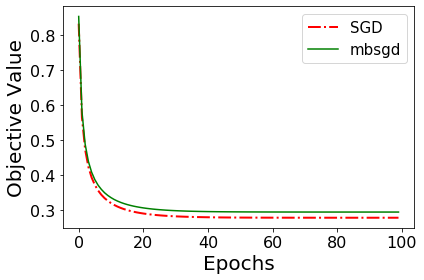

In [342]:
# plot the 2 curves:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 4))

epochs_sgd = range(len(objvals_sgd))
epochs_mbsgd = range(len(objvals_mbsgd))


line1, = plt.plot(epochs_sgd, objvals_sgd, '-.r', LineWidth=2)
line2, = plt.plot(epochs_mbsgd, objvals_mbsgd,'-g' )

plt.xlabel('Epochs', FontSize=20)
plt.ylabel('Objective Value', FontSize=20)
plt.xticks(FontSize=16)
plt.yticks(FontSize=16)
plt.legend([line1, line2  ], ['SGD', 'mbsgd'], fontsize=15)
plt.tight_layout()
plt.show()
fig.savefig('compare_gd_sgd.pdf', format='pdf', dpi=1200)

## 3.1.6  Prediction and evalution 
- We will make the prediction and evalution on the test set
- We will also use the result from SGD and MB-SGD

In [280]:
import pandas as pd
from sklearn import metrics
# Define a prediction function,using softmax regression
# Inputs: 
#     w : a k-by-d matrix, the solution from the SGD or Mini-batch SGD
#     x : a n-by-d matrix
# Output:
#     x_predict: a n-by-1 matrix
def predict_softmax(w,x):
    phi = np.dot(w,x.T) # k-by-n matrix
    pred1 = softmax(phi).T # n-by-k matrix
    df = pd.DataFrame(pred1)
    x_predict = df.idxmax(axis=1, skipna=True) # n-by-1 matrix
    return x_predict
   
# Define a function to evaluate the result 
# Inputs:
#     y_label: a n-by-1 matrix, the true label from the test set
#     y_predict: a n-by-1 matrix
def evalution_softmax(y_label,y_predict):
    result = metrics.classification_report(y_label, y_predict)
    print(result)

In [281]:
# Evalute the result of Mini-batch SGD
y_label = y_test
y_predict_mbsgd = predict_softmax(w_mb,dtm_test.todense())
evalution_softmax(y_label,y_predict_mbsgd)

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       313
         1.0       0.91      0.77      0.84       273
         2.0       0.89      0.92      0.91       308

    accuracy                           0.88       894
   macro avg       0.89      0.88      0.88       894
weighted avg       0.88      0.88      0.88       894



In [282]:
# Evalute the result of SGD
y_label = y_test
y_predict_sgd = predict_softmax(w_sgd,dtm_test.todense())
evalution_softmax(y_label,y_predict_sgd)

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.89       313
         1.0       0.91      0.76      0.83       273
         2.0       0.89      0.93      0.91       308

    accuracy                           0.88       894
   macro avg       0.88      0.87      0.87       894
weighted avg       0.88      0.88      0.88       894



## 3.2.  Build and train a Multilayer Perceptron (MLP) model (i.e., a two-layer neural network) using backpropagation.
 - Please specify the settings of the model such as the network structure,
   the optimizer, the initial learning rate, the loss function.

In [365]:
# Recall the shape of each part of data
print('Shape of x_train: ' + str(dtm_train.shape))
print('Shape of y_train: ' + str(label_train.shape))
print('Shape of x_test: ' + str(dtm_test.shape))
print('Shape of y_test: ' + str(label_test.shape))

Shape of x_train: (1814, 196)
Shape of y_train: (1814, 3)
Shape of x_test: (894, 196)
Shape of y_test: (894, 3)


## 3.2.1. Build and train a Multilayer Perceptron (MLP) model

In [397]:
# Create the neural network
from keras import layers
from keras import models
from keras import optimizers
network = models.Sequential()
network.add(layers.Dense(1024, activation='relu', input_shape=(dtm_train.shape[1],)))
network.add(layers.Dense(3, activation='softmax'))
rmsprop = optimizers.RMSprop(learning_rate=0.1, rho=0.9)
network.compile(optimizer = rmsprop, loss='categorical_crossentropy',
                metrics=['accuracy'])

In [398]:
# Training the neural network
model = network.fit(dtm_train.todense(), label_train,validation_split=0.33, epochs=100, batch_size=128)

Train on 1215 samples, validate on 599 samples
Epoch 1/100
1215/1215 [==============================] - 0s 167us/step - loss: 31.8488 - accuracy: 0.6617 - val_loss: 0.8911 - val_accuracy: 0.7947
Epoch 2/100
1215/1215 [==============================] - 0s 41us/step - loss: 0.2912 - accuracy: 0.9177 - val_loss: 0.9857 - val_accuracy: 0.8013
Epoch 3/100
1215/1215 [==============================] - 0s 44us/step - loss: 0.0851 - accuracy: 0.9654 - val_loss: 0.7251 - val_accuracy: 0.8364
Epoch 4/100
1215/1215 [==============================] - 0s 44us/step - loss: 0.0160 - accuracy: 0.9959 - val_loss: 0.7601 - val_accuracy: 0.8280
Epoch 5/100
1215/1215 [==============================] - 0s 47us/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.7795 - val_accuracy: 0.8381
Epoch 6/100
1215/1215 [==============================] - 0s 38us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8111 - val_accuracy: 0.8397
Epoch 7/100
1215/1215 [==============================] - 0s 39us/step - los

1215/1215 [==============================] - 0s 37us/step - loss: 5.8869e-10 - accuracy: 1.0000 - val_loss: 1.4913 - val_accuracy: 0.8497
Epoch 56/100
1215/1215 [==============================] - 0s 35us/step - loss: 1.1774e-09 - accuracy: 1.0000 - val_loss: 1.4941 - val_accuracy: 0.8497
Epoch 57/100
1215/1215 [==============================] - 0s 31us/step - loss: 9.8115e-10 - accuracy: 1.0000 - val_loss: 1.4954 - val_accuracy: 0.8497
Epoch 58/100
1215/1215 [==============================] - 0s 32us/step - loss: 1.1774e-09 - accuracy: 1.0000 - val_loss: 1.5010 - val_accuracy: 0.8497
Epoch 59/100
1215/1215 [==============================] - 0s 30us/step - loss: 8.8303e-10 - accuracy: 1.0000 - val_loss: 1.5063 - val_accuracy: 0.8497
Epoch 60/100
1215/1215 [==============================] - 0s 32us/step - loss: 1.2755e-09 - accuracy: 1.0000 - val_loss: 1.4978 - val_accuracy: 0.8497
Epoch 61/100
1215/1215 [==============================] - 0s 31us/step - loss: 1.0793e-09 - accuracy: 1.000

## 3.2.2. The summary of Multilayer Perceptron (MLP) model
- #### Network structure: the bellow table shows
- #### Optimizer: RMSProp optimizer
- #### Initial learning rate: 0.1
- #### Loss function: categorical_crossentropy
- #### Metrics: accuracy

In [399]:
network.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 1024)              201728    
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 3075      
Total params: 204,803
Trainable params: 204,803
Non-trainable params: 0
_________________________________________________________________


## 3.2.3.   Prediction and evalution 
- We will make the prediction and evalution on the test set

In [400]:
# Report the recall and precision for each category on the test sets
from sklearn.metrics import classification_report
y_pred_NN = network.predict(dtm_test.todense(), batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred_NN, axis=1)
print(classification_report(y_test, y_pred_bool))

894/894 [==============================] - 0s 152us/step
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       313
         1.0       0.93      0.82      0.88       273
         2.0       0.93      0.93      0.93       308

    accuracy                           0.90       894
   macro avg       0.91      0.90      0.90       894
weighted avg       0.90      0.90      0.90       894



In [401]:
# Report the test accuracy
test_loss, test_acc = network.evaluate(dtm_test.todense(), label_test)
print('test_acc', test_acc)

894/894 [==============================] - 0s 53us/step
test_acc 0.9015659689903259


# 4. Plot training loss and validation loss every 100 epoches

## 4.1.  Multilayer Perceptron (MLP) model

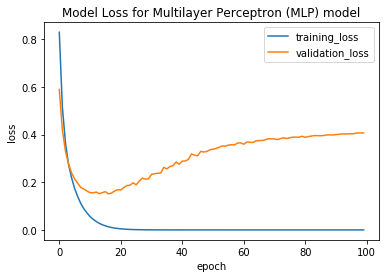

In [351]:
# Plot training loss and validation loss every 100 epoches
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss for Multilayer Perceptron (MLP) model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()

## 4.2. Logistic Regression (LR) model with mini-batch gradient descent 

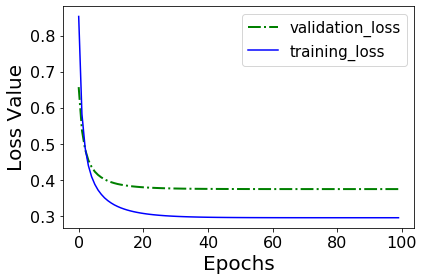

In [356]:
# Plot training loss and validation loss every 100 epoches for mini-batch GD
epochs_mbsgd = range(len(objvals_mbsgd))

line1, = plt.plot(epochs_mbsgd, valloss_mbsdg, '-.g', LineWidth=2)
line2, = plt.plot(epochs_mbsgd, objvals_mbsgd,'-b' )

plt.xlabel('Epochs', FontSize=20)
plt.ylabel('Loss Value', FontSize=20)
plt.xticks(FontSize=16)
plt.yticks(FontSize=16)
plt.legend([line1, line2], ['validation_loss', 'training_loss'], fontsize=15)
plt.tight_layout()
plt.show()


## 4.3.  Logistic Regression (LR) model with stochastic gradient descent

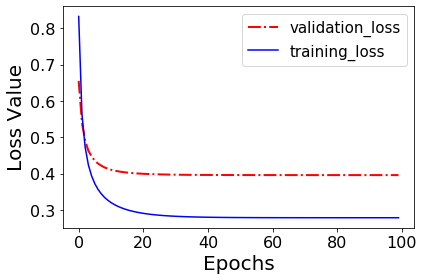

In [354]:
# Plot training loss and validation loss every 100 epoches for SGD
epochs_sgd = range(len(objvals_sgd))
line1, = plt.plot(epochs_sgd, valloss_sdg, '-.r', LineWidth=2)
line2, = plt.plot(epochs_sgd, objvals_sgd,'-b' )

plt.xlabel('Epochs', FontSize=20)
plt.ylabel('Loss Value', FontSize=20)
plt.xticks(FontSize=16)
plt.yticks(FontSize=16)
plt.legend([line1, line2], ['validation_loss', 'training_loss'], fontsize=15)
plt.tight_layout()
plt.show()



# 5. Use cross-validation on the training data
 - ### Report the recall and precision for each category on the test and validation sets, choose the best λ(in LR) and the number of neurons in the hidden layer (in MLP) using the validation set.

In [458]:
print('Shape of x_train: ' + str(dtm_train.shape))
print('Shape of y_train: ' + str(label_train.shape))
print('Shape of x_test: ' + str(dtm_test.shape))
print('Shape of y_test: ' + str(label_test.shape))

Shape of x_train: (1814, 196)
Shape of y_train: (1814, 3)
Shape of x_test: (894, 196)
Shape of y_test: (894, 3)


## 5.1. Cross-validation on Logistic Regression (LR) model with mini-batch gradient descent
- We choose the k-fold Cross-validation with k = 7

In [566]:
# This function is just for training to get w use mini-batch gradient descent
# which is very similar to the mb_sgd function
def mb_sgd_train(x, y, lam, b, stepsize, max_epoch=100, w=None):
    n, d = x.shape
    n, k = y.shape
    objvals = np.zeros(max_epoch) # store the objective values
    if w is None:
        w = np.random.random_sample((k, d)) #  initialization w
        
    for t in range(max_epoch):
        # randomly shuffle the samples
        rand_indices = np.random.permutation(n)
        x_rand = x[rand_indices, :]
        y_rand = y[rand_indices, :]
        
        objval = 0 # accumulate the objective values
        iterations = int(n/b) # calculate the time of iterations
        for i in range(iterations):
            xi = x_rand[i*b:i*b + b, :] # b-by-d matrix 
            yi = y_rand[i*b:i*b + b, :] # b-by-k matrix
            obj,g = mb_stochastic_objective_gradient(w, xi, yi, lam, b)
            objval += obj
            w -= stepsize * g
        stepsize *= 0.9 # decrease step size ; to be tuned
        objval /= iterations
        objvals[t] = objval
    
    return w

In [623]:
from sklearn.model_selection import StratifiedKFold
import numpy as mp
from sklearn.metrics import precision_recall_fscore_support
def cv_LR_mbsgd(lam,X,y,x_test,y_test):
    # X = dtm_train.todense()
    # y = y_train
    # x_test = dtm_test.todense()
    # y_test = y_test
    # Set the initial parameter for training 
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    b = 16
    stepsize = 0.1
    # Fix random seed for reproducibility
    seed = 8
    np.random.seed(seed)
    # Define 7-fold cross validation test harness
    kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=seed)
    precisions = [] # store the precisions values
    recalls = [] # store the recalls values
    for train, val in kfold.split(X, y):
        x_train, y_train = X.iloc[train,].to_numpy(), y.iloc[train,].to_numpy()
        x_vali, y_vali = X.iloc[val,].to_numpy(), y.iloc[val,].to_numpy()
        w_mb = mb_sgd_train(x_train, to_categorical(y_train), lam, b, stepsize, max_epoch=100, w=None)
        # Evalute the result of Mini-batch SGD on the validation set
        y_label_val = y_vali
        y_predict_mbsgd_val = predict_softmax(w_mb,x_vali)
        print('Recall and Precision for each category on validation sets: ')
        evalution_softmax(y_label_val,y_predict_mbsgd_val)
        precision,recall,f1,support = precision_recall_fscore_support(y_label_val,y_predict_mbsgd_val, average='macro')
        precisions.append(precision)
        recalls.append(recall)
        print('\n\n')
        # Evalute the result of Mini-batch SGD on the test set
        print('Recall and Precision for each category on test sets: ')
        y_label_test = y_test
        y_predict_mbsgd_test = predict_softmax(w_mb,x_test)
        evalution_softmax(y_label_test,y_predict_mbsgd_test)
        print('\n\n\n')
    
    pre_avg = np.array(precisions).mean()
    reca_avg = np.array(recalls).mean()
    return pre_avg, reca_avg
    
    

## 5.1.1 Report the recall and precision for each category on the test and validation sets

In [626]:
# We choose lam = 1E-6 as a example to show the recall and precision 
# for each category on the test and validation sets
# You can see the report bellow
cv_LR_mbsgd(1E-6 ,dtm_train.todense(),y_train,dtm_test.todense(),y_test)

Recall and Precision for each category on validation sets: 
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        90
         1.0       0.81      0.68      0.74        81
         2.0       0.78      0.91      0.84        89

    accuracy                           0.82       260
   macro avg       0.82      0.81      0.81       260
weighted avg       0.82      0.82      0.82       260




Recall and Precision for each category on test sets: 
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       313
         1.0       0.92      0.75      0.83       273
         2.0       0.88      0.93      0.91       308

    accuracy                           0.88       894
   macro avg       0.88      0.87      0.87       894
weighted avg       0.88      0.88      0.88       894





Recall and Precision for each category on validation sets: 
              precision    recall  f1-score   support

  

(0.8582544664204035, 0.8539542022688089)

## 5.1.2. Choose the best λ(in LR) with mini-batch gradient descent¶

In [629]:
# We select lam in [1,1E-1,1E-2,1E-3,1E-4,1E-5,1E-6,1E-7,1E-8]
lams = [1,1E-1,1E-2,1E-3,1E-4,1E-5,1E-6,1E-7,1E-8]

# We change a little bit for the cv_LR_mbsgd function to cv_LR_mbsgd_findlam
# which only use validation set to make the prediction
def cv_LR_mbsgd_findlam(lam,X,y):
    # X = dtm_train.todense()
    # y = y_train
    # Set the initial parameter for training 
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    b = 16
    stepsize = 0.1
    # Fix random seed for reproducibility
    seed = 8
    np.random.seed(seed)
    # Define 7-fold cross validation test harness
    kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=seed)
    precisions = [] # store the precisions values
    recalls = [] # store the recalls values
    for train, val in kfold.split(X, y):
        x_train, y_train = X.iloc[train,].to_numpy(), y.iloc[train,].to_numpy()
        x_vali, y_vali = X.iloc[val,].to_numpy(), y.iloc[val,].to_numpy()
        w_mb = mb_sgd_train(x_train, to_categorical(y_train), lam, b, stepsize, max_epoch=100, w=None)
        # Evalute the result of Mini-batch SGD on the validation set
        y_label_val = y_vali
        y_predict_mbsgd_val = predict_softmax(w_mb,x_vali)
        precision,recall,f1,support = precision_recall_fscore_support(y_label_val,y_predict_mbsgd_val, average='macro')
        precisions.append(precision)
        recalls.append(recall)
    pre_avg = np.array(precisions).mean()
    reca_avg = np.array(recalls).mean()
    return pre_avg, reca_avg

In [657]:
# Calculate the recall and precision for each lam
# and find the best lam
precision_mbsgd = []
recall_mbsdg = []
for lam in lams:
    a,b = cv_LR_mbsgd_findlam(lam ,dtm_train.todense(),y_train)
    precision_mbsgd.append(a)
    recall_mbsdg.append(b)   

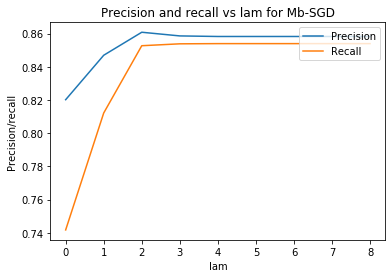

In [658]:
# Plot the result
plt.plot(np.arange(len(lams)),np.array(precision_mbsgd),label = 'Precision')
plt.plot(np.arange(len(lams)),np.array(recall_mbsdg),label = 'Recall')
plt.title('Precision and recall vs lam for Mb-SGD')
plt.ylabel('Precision/recall')
plt.xlabel('lam')
plt.legend(loc='upper right')
plt.show()

### Conclusion: from the plot above, in the case of Mini-batch SGD:
- ### we should choose lam = 1E-2(0.01)

## 5.2. Cross-validation on Logistic Regression (LR) model with stochastic gradient descent
- We choose the k-fold Cross-validation with k = 7

In [642]:
# This function is just for training to get w use stochastic gradient descent
# which is very similar to the sgd function 
def sgd_train(x, y, lam, stepsize, max_epoch=100, w=None):
    n, d = x.shape
    n, k = y.shape
    objvals = np.zeros(max_epoch) # store the objective values
    if w is None:
        w = np.random.random_sample((k, d)) # initialization w
    
    for t in range(max_epoch):
        # randomly shuffle the samples
        rand_indices = np.random.permutation(n)
        x_rand = x[rand_indices, :]
        y_rand = y[rand_indices, :]
        
        objval = 0 # accumulate the objective values
        for i in range(n):
            xi = x_rand[i, :] # 1-by-d matrix
            yi = y_rand[i, :] # 1-by-k matrix
            obj, g = stochastic_objective_gradient(w, xi, yi, lam)
            objval += obj
            w -= stepsize * g
        
        stepsize *= 0.9 # decrease step size
        objval /= n
        objvals[t] = objval
    
    return w

In [645]:
from sklearn.model_selection import StratifiedKFold
import numpy as mp
from sklearn.metrics import precision_recall_fscore_support
def cv_LR_sgd(lam,X,y,x_test,y_test):
    # X = dtm_train.todense()
    # y = y_train
    # x_test = dtm_test.todense()
    # y_test = y_test
    # Set the initial parameter for training 
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    b = 16
    stepsize = 0.1
    # Fix random seed for reproducibility
    seed = 8
    np.random.seed(seed)
    # Define 7-fold cross validation test harness
    kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=seed)
    precisions = [] # store the precisions values
    recalls = [] # store the recalls values
    for train, val in kfold.split(X, y):
        x_train, y_train = X.iloc[train,].to_numpy(), y.iloc[train,].to_numpy()
        x_vali, y_vali = X.iloc[val,].to_numpy(), y.iloc[val,].to_numpy()
        w_sdg = sgd_train(x_train, to_categorical(y_train), lam, stepsize, max_epoch=100, w=None)
        # Evalute the result of Mini-batch SGD on the validation set
        y_label_val = y_vali
        y_predict_sgd_val = predict_softmax(w_sdg,x_vali)
        y_pred_bool = np.argmax(y_predict_sgd_val, axis=1)
        print('Recall and Precision for each category on validation sets: ')
        evalution_softmax(y_label_val,y_predict_sgd_val)
        precision,recall,f1,support = precision_recall_fscore_support(y_label_val,y_predict_sgd_val, average='macro')
        precisions.append(precision)
        recalls.append(recall)
        print('\n\n')
        # Evalute the result of Mini-batch SGD on the test set
        print('Recall and Precision for each category on test sets: ')
        y_label_test = y_test
        y_predict_sgd_test = predict_softmax(w_sdg,x_test)
        evalution_softmax(y_label_test,y_predict_sgd_test)
        print('\n\n\n')
    
    pre_avg = np.array(precisions).mean()
    reca_avg = np.array(recalls).mean()
    return pre_avg, reca_avg

## 5.2.1.  Report the recall and precision for each category on the test and validation sets

In [647]:
# We choose lam = 1E-3 as a example to show the recall and precision 
# for each category on the test and validation sets
# You can see the report bellow
cv_LR_sgd(1E-3 ,dtm_train.todense(),y_train,dtm_test.todense(),y_test)

Recall and Precision for each category on validation sets: 
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86        90
         1.0       0.88      0.60      0.72        81
         2.0       0.75      0.94      0.84        89

    accuracy                           0.81       260
   macro avg       0.82      0.81      0.80       260
weighted avg       0.82      0.81      0.81       260




Recall and Precision for each category on test sets: 
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       313
         1.0       0.95      0.71      0.81       273
         2.0       0.87      0.96      0.91       308

    accuracy                           0.88       894
   macro avg       0.89      0.87      0.87       894
weighted avg       0.88      0.88      0.87       894





Recall and Precision for each category on validation sets: 
              precision    recall  f1-score   support

  

(0.8567554245547768, 0.8473149844560581)

## 5.2.2. Choose the best λ(in LR) with stochastic gradient descent¶

In [650]:
# We select lam in [1,1E-1,1E-2,1E-3,1E-4,1E-5,1E-6,1E-7,1E-8]
lams = [1,1E-1,1E-2,1E-3,1E-4,1E-5,1E-6,1E-7,1E-8]

# We change a little bit for the cv_LR_sgd function to cv_LR_sgd_findlam
# which only use validation set to make the prediction
def cv_LR_sgd_findlam(lam,X,y):
    # X = dtm_train.todense()
    # y = y_train
    # Set the initial parameter for training 
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    b = 16
    stepsize = 0.1
    # Fix random seed for reproducibility
    seed = 8
    np.random.seed(seed)
    # Define 7-fold cross validation test harness
    kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=seed)
    precisions = [] # store the precisions values
    recalls = [] # store the recalls values
    for train, val in kfold.split(X, y):
        x_train, y_train = X.iloc[train,].to_numpy(), y.iloc[train,].to_numpy()
        x_vali, y_vali = X.iloc[val,].to_numpy(), y.iloc[val,].to_numpy()
        w_sdg = sgd_train(x_train, to_categorical(y_train), lam, stepsize, max_epoch=100, w=None)
        # Evalute the result of Mini-batch SGD on the validation set
        y_label_val = y_vali
        y_predict_sgd_val = predict_softmax(w_sdg,x_vali)

        precision,recall,f1,support = precision_recall_fscore_support(y_label_val,y_predict_sgd_val, average='macro')
        precisions.append(precision)
        recalls.append(recall)
    
    pre_avg = np.array(precisions).mean()
    reca_avg = np.array(recalls).mean()
    return pre_avg, reca_avg

In [659]:
# Calculate the recall and precision for each lam
# and find the best lam
precision_sgd = []
recall_sdg = []
for lam in lams:
    c,d = cv_LR_sgd_findlam(lam ,dtm_train.todense(),y_train)
    precision_sgd.append(c)
    recall_sdg.append(d) 

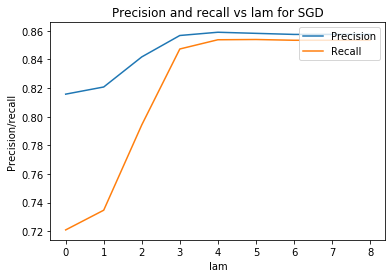

In [660]:
# Plot the result
plt.plot(np.arange(len(lams)),np.array(precision_sgd),label = 'Precision')
plt.plot(np.arange(len(lams)),np.array(recall_sdg),label = 'Recall')
plt.title('Precision and recall vs lam for SGD')
plt.ylabel('Precision/recall')
plt.xlabel('lam')
plt.legend(loc='upper right')
plt.show()

### Conclusion: from the plot above, in the case of SGD:
- ### we should choose lam = 1E-4(0.0001)

## 5.3. Cross-validation on Multilayer Perceptron (MLP) model
- We choose the k-fold cross validation with k = 7

In [689]:
from sklearn.model_selection import StratifiedKFold
import numpy as mp
from sklearn.metrics import precision_recall_fscore_support
from keras import layers
from keras import models
from keras import optimizers
def cv_MLP(n,X,y,x_test,y_test):
    # n:number of neurons in the hidden layer
    # X = dtm_train.todense()
    # y = y_train
    # x_test = dtm_test.todense()
    # y_test = y_test
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    # Fix random seed for reproducibility
    seed = 8
    np.random.seed(seed)
    # Define 7-fold cross validation test harness
    kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=seed)
    precisions = [] # store the precisions values
    recalls = [] # store the recalls values
    for train, val in kfold.split(X, y):
        x_train, y_train = X.iloc[train,].to_numpy(), y.iloc[train,].to_numpy()
        x_vali, y_vali = X.iloc[val,].to_numpy(), y.iloc[val,].to_numpy()

        network = models.Sequential()
        network.add(layers.Dense(n, activation='relu', input_shape=(x_train.shape[1],)))
        network.add(layers.Dense(3, activation='softmax'))
        rmsprop = optimizers.RMSprop(learning_rate=0.1, rho=0.9)
        network.compile(optimizer = rmsprop, loss='categorical_crossentropy',metrics=['accuracy'])
        model = network.fit(x_train, to_categorical(y_train), epochs=100, batch_size=128,verbose=0 )
        # Evalute the result of Multilayer Perceptron (MLP) model on the validation set
        y_label_val = y_vali
        y_predict_mlp_val = network.predict(x_vali, batch_size=64, verbose=0)
        y_pred_bool = np.argmax(y_predict_mlp_val, axis=1)
        print('Recall and Precision for each category on validation sets: ')
        print(classification_report(y_label_val, y_pred_bool))
        precision,recall,f1,support = precision_recall_fscore_support(y_label_val,y_pred_bool, average='macro')
        precisions.append(precision)
        recalls.append(recall)
        print('\n\n')
        # Evalute the result of Multilayer Perceptron (MLP) model on the test set
        print('Recall and Precision for each category on test sets: ')
        y_label_test = y_test
        y_predict_mlp_test = network.predict(x_test, batch_size=64, verbose=0)
        y_pred_bool_test = np.argmax(y_predict_mlp_test, axis=1)
        print(classification_report(y_label_test, y_pred_bool_test))
        print('\n\n\n')
    
    pre_avg = np.array(precisions).mean()
    reca_avg = np.array(recalls).mean()
    return pre_avg, reca_avg

## 5.3.1. Report the recall and precision for each category on the test and validation sets for MLP

In [690]:
# We choose n = 32 as a example to show the recall and precision 
# for each category on the test and validation sets
# You can see the report bellow
cv_MLP(32,dtm_train.todense(),y_train,dtm_test.todense(),y_test)

Recall and Precision for each category on validation sets: 
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85        90
         1.0       0.79      0.75      0.77        81
         2.0       0.84      0.92      0.88        89

    accuracy                           0.83       260
   macro avg       0.83      0.83      0.83       260
weighted avg       0.83      0.83      0.83       260




Recall and Precision for each category on test sets: 
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90       313
         1.0       0.90      0.82      0.86       273
         2.0       0.93      0.94      0.93       308

    accuracy                           0.90       894
   macro avg       0.90      0.90      0.90       894
weighted avg       0.90      0.90      0.90       894





Recall and Precision for each category on validation sets: 
              precision    recall  f1-score   support

  

(0.8729351670576054, 0.8704642135041636)

## 5.3.2. Choose the number of neurons in the hidden layer (in MLP) using the validation set

In [678]:
# We choose the number of neurons in the hidden layer in [2**k for k in range(10)]
n_neurons = [2**k for k in np.arange(13)]

# We change a little bit for the cv_MLP function to cv_MLP_findn
# which only use validation set to make the prediction
def cv_MLP_findn(n,X,y):
    # n:number of neurons in the hidden layer
    # X = dtm_train.todense()
    # y = y_train
    # x_test = dtm_test.todense()
    # y_test = y_test
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    # Fix random seed for reproducibility
    seed = 8
    np.random.seed(seed)
    # Define 7-fold cross validation test harness
    kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=seed)
    precisions = [] # store the precisions values
    recalls = [] # store the recalls values
    for train, val in kfold.split(X, y):
        x_train, y_train = X.iloc[train,].to_numpy(), y.iloc[train,].to_numpy()
        x_vali, y_vali = X.iloc[val,].to_numpy(), y.iloc[val,].to_numpy()

        network = models.Sequential()
        network.add(layers.Dense(n, activation='relu', input_shape=(x_train.shape[1],)))
        network.add(layers.Dense(3, activation='softmax'))
        rmsprop = optimizers.RMSprop(learning_rate=0.1, rho=0.9)
        network.compile(optimizer = rmsprop, loss='categorical_crossentropy',metrics=['accuracy'])
        model = network.fit(x_train, to_categorical(y_train), epochs=100, batch_size=128,verbose=0 )
        # Evalute the result of Multilayer Perceptron (MLP) model on the validation set
        y_label_val = y_vali
        y_predict_mlp_val = network.predict(x_vali, batch_size=64, verbose=0)
        y_pred_bool = np.argmax(y_predict_mlp_val, axis=1)
        precision,recall,f1,support = precision_recall_fscore_support(y_label_val,y_pred_bool, average='macro')
        precisions.append(precision)
        recalls.append(recall)
    
    pre_avg = np.array(precisions).mean()
    reca_avg = np.array(recalls).mean()
    return pre_avg, reca_avg

In [679]:
# Calculate the recall and precision for each n in n_neurons
# and find the best n
precision_mlp = []
recall_mlp = []
for n in n_neurons:
    e,f = cv_MLP_findn(n,dtm_train.todense(),y_train)
    precision_mlp.append(e)
    recall_mlp.append(f) 

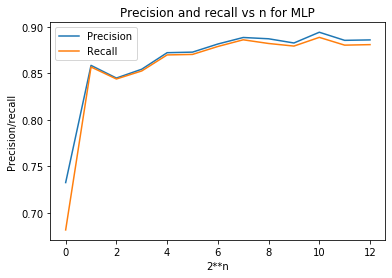

In [686]:
# Plot the result
plt.plot(np.arange(len(n_neurons)),np.array(precision_mlp),label = 'Precision')
plt.plot(np.arange(len(n_neurons)),np.array(recall_mlp),label = 'Recall')
plt.title('Precision and recall vs n for MLP')
plt.ylabel('Precision/recall')
plt.xlabel('2**n')
plt.legend()
plt.show()

### Conclusion: from the plot above, in the case of MLP:
- ### We should choose n = 2**10 = 1024
- ### The number of neurons in the hidden layer should be 1024

## 5.4. Conclusion
- For Logistic Regression model with L2 regularization
  - With mini-batch gradient descent: lam = 0.01
  - With stochastic gradient descent: lam = 0.0001
- For Multilayer Perceptron (MLP) model
  - The number of neurons in the hidden layer: n = 1024

# 6. Compare both classifiers and provide an analysis for the results
- Since we know the best parameter for each method
- We use the best parameter to fit the model on the training set
- At last we use test to evaluate the method

In [698]:
# For logistic regression with mini-batch SDG
# lam = 1E-2(0.01)--the best lam
# b = 32
# stepsize = 0.1
w_mb_best_lam = mb_sgd_train(dtm_train.todense(), to_categorical(y_train), 0.01, 32, 0.1, max_epoch=100, w=None)
y_true = y_test
y_predict_mbsgd_test = predict_softmax(w_mb_best_lam,dtm_test.todense())

In [710]:
# For logistic regression with SGD
# lam =  lam = 1E-4(0.0001)--the best lam
# stepsize = 0.1
w_sgd_best_lam = sgd_train(dtm_train.todense(), to_categorical(y_train), 1E-4, 0.1, max_epoch=100, w=None)
y_true = y_test
y_predicr_sgd_test = predict_softmax(w_sgd_best_lam,dtm_test.todense())

In [705]:
from keras import layers
from keras import models
from keras import optimizers
# For the MLP
# n = 1024
NN = models.Sequential()
NN.add(layers.Dense(1024, activation='relu', input_shape=(dtm_train.todense().shape[1],)))
NN.add(layers.Dense(3, activation='softmax'))
rmsprop = optimizers.RMSprop(learning_rate=0.1, rho=0.9)
NN.compile(optimizer = rmsprop, loss='categorical_crossentropy',metrics=['accuracy'])
NN_best_n = NN.fit(dtm_train.todense(), to_categorical(y_train), epochs=100, batch_size=128,verbose=0 )
y_true = y_test
y_predict_mlp_test = network.predict(dtm_test.todense(), batch_size=64, verbose=0)
y_pred_bool = np.argmax(y_predict_mlp_test, axis=1)


In [733]:
# Define a function that print out the evalution
def evalu(y_label,y_predict):
    accuracy = metrics.accuracy_score(y_label,y_predict)
    confusion = metrics.confusion_matrix(y_label,y_predict)
    print('1. The accuracy rate is: \n'+ str(accuracy))
    print('\n2. The confusion matrix is: ')
    print(confusion)
    print('\n3. The recall and precision for each category: ')
    evalution_softmax(y_label,y_predict)
    

In [734]:
# For logistic regression with mini-batch SDG
print('The logistic regression with mini-batch SDG:\n')
evalu(y_true,y_predict_mbsgd_test)

The logistic regression with mini-batch SDG:

1. The accuracy rate is: 
0.8758389261744967

2. The confusion matrix is: 
[[295   9   9]
 [ 46 201  26]
 [ 13   8 287]]

3. The recall and precision for each category: 
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       313
         1.0       0.92      0.74      0.82       273
         2.0       0.89      0.93      0.91       308

    accuracy                           0.88       894
   macro avg       0.88      0.87      0.87       894
weighted avg       0.88      0.88      0.87       894



In [735]:
# For logistic regression with SGD
print('The logistic regression with SGD: \n')
evalu(y_true,y_predicr_sgd_test)

The logistic regression with SGD: 

1. The accuracy rate is: 
0.8825503355704698

2. The confusion matrix is: 
[[295  10   8]
 [ 40 208  25]
 [ 13   9 286]]

3. The recall and precision for each category: 
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       313
         1.0       0.92      0.76      0.83       273
         2.0       0.90      0.93      0.91       308

    accuracy                           0.88       894
   macro avg       0.89      0.88      0.88       894
weighted avg       0.89      0.88      0.88       894



In [736]:
# For the MLP
print('The Multilayer Perceptron (MLP) model: \n')
evalu(y_true,y_pred_bool)

The Multilayer Perceptron (MLP) model: 

1. The accuracy rate is: 
0.901565995525727

2. The confusion matrix is: 
[[294   8  11]
 [ 36 225  12]
 [ 13   8 287]]

3. The recall and precision for each category: 
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       313
         1.0       0.93      0.82      0.88       273
         2.0       0.93      0.93      0.93       308

    accuracy                           0.90       894
   macro avg       0.91      0.90      0.90       894
weighted avg       0.90      0.90      0.90       894



- ### 1. From the report above, we find that the Multilayer Perceptron (MLP) model behaves the best in accuracy rate, average recall and average precision. Logistic regression with  SGD is better than MB-SGD. This is consist with the previous plot for loss function verse epoch. 
- ### 2. We also find that both of the method classify the best on the category 1 and behave bad on category 0. This may because the feature in category 1 is more obvious than other two. 
- ### 3. From the confusion matrix A, we find that A(2,1) is much higher than other error. This  means category 0 are more likely to be misclassified to category 1. All of the method show this.